In [7]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### 1. Data Sourcing

In [5]:
# Read the csv file. Adding low_memory = False to avoid high memory usage warning
loan = pd.read_csv('loan.csv', encoding = 'ISO-8859-1', low_memory = False)

# Data Check to validate
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

##### 2. Data Cleaning

In [6]:
# Initial DataFrame Shape (Observations, Variables)
loan.shape

(39717, 111)

Delete Unnecessary Rows and Columns

In [8]:
# Get the Percentage Rate of NaN or NULL values in each column
round(loan.isnull().sum(axis = 0)/len(loan), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


Most of the columns has 100% Null values and can be safely droped. There are some columns where NULL value 
rate is 2%, 33%, 65%, 93% and 97%. 93% and 97% columns can be dropped as well. It is now necessary to put a 
threshold of the rate. Looking into the criticality of the columns and NULL values rate, it is okay to consider 
the rate as 30%. So any Columns having NaN or NULL values greater than or equal to 30% can be safely dropped.

Therefore, Threshold Dropped Percentage Rate = 30%

In [9]:
cols = pd.DataFrame(data = round(loan.isnull().sum(axis = 0)/len(loan), 2)*100, columns = ['null_percent'])

# Dropping Columns
loan.drop(labels = cols[cols.null_percent >= 30].index, axis = 1, inplace = True)

In [10]:
# Checking NaN or NULL Value Percentage in Rows even greater than 1%

rows = pd.DataFrame(data = round(loan.isnull().sum(axis = 1)/len(loan), 2)*100, columns = ['null_percent'])
rows[rows.null_percent >= 1].index

# From the output, We can conclude - No Rows with NaN or NULL has values greter than 1%. No Row needs to be deleted.

Int64Index([], dtype='int64')

Insignificant Columns can be dropped :

        1.  id
        2.  member_id
        3.  verification_status
        4.  pymnt_plan
        5.  url
        6.  zip_code
        7.  initial_list_status
        8.  collections_12_mths_ex_med
        9.  policy_code
        10. application_type
        11. acc_now_delinq
        12. chargeoff_within_12_mths
        13. delinq_amnt
        14. tax_liens
        15. title
        16. total_rec_prncp
        17. total_rec_int
        18. total_rec_late_fee
        19. recoveries
        20. collection_recovery_fee
        21. last_pymnt_amnt
        22. revol_bal

In [11]:
# Dropping insignificant columns
loan.drop(labels = ['id', 'member_id', 'verification_status', 'pymnt_plan', 'url', 'zip_code', 'initial_list_status', 
                    'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 
                    'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'title', 'total_rec_prncp', 
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt', 'revol_bal'],
          axis = 1, inplace = True
         )

Filtering Data


As per Data Disctionary, Variable home_ownership has 4 valid values - RENT, OWN, MORTGAGE, OTHER. However, in
data, there are 3 records whose value is NONE. Since record is very minimum and doesn't add any significant 
value, so dropping rows of those 3 records.

In [12]:
# Dropping Record where home_ownership = NONE
loan = loan[loan.home_ownership != 'NONE']

# Dropping any Duplicate Rows, if any (Keeping the First Value and dropping the rest)
loan.drop_duplicates(keep = 'first', inplace = True)

count    3.971400e+04
mean     6.896804e+04
std      6.379504e+04
min      4.000000e+03
25%      4.040450e+04
50%      5.900000e+04
75%      8.229900e+04
max      6.000000e+06
Name: annual_inc, dtype: float64




[]

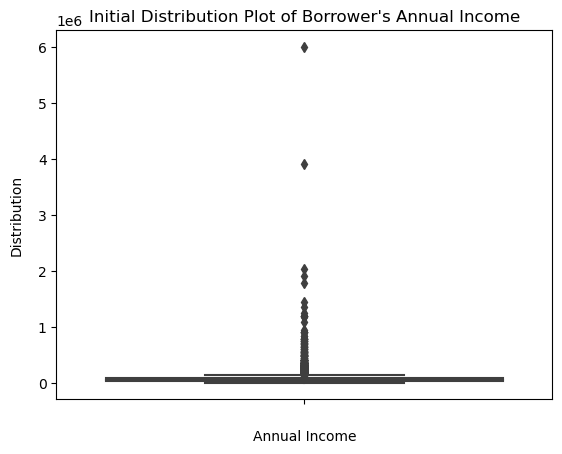

In [13]:
# Removing Outliers

# Column = annual_inc

print(loan.annual_inc.describe())
print('\n')

plt.title("Initial Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = loan)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

The above graph shows that there is a high amount outlier present. Maximum value is 87 times higher than Mean 
and 102 times high than Median. Considering a Hit and Trial Run, it is found that the outliers lies above 99th 
percentiles. So dropping those outliers.

Quantile Value = 234999.48


count     39316.000000
mean      65523.055274
std       35215.050064
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64




[]

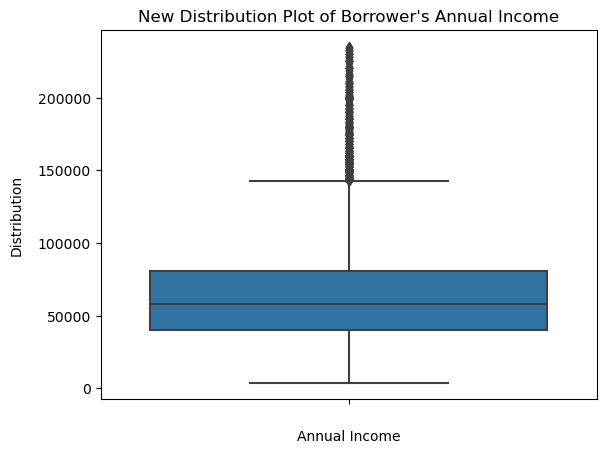

In [14]:
qnt = loan.annual_inc.quantile(0.99)

print('Quantile Value =', qnt)
print('\n')

loan = loan[loan.annual_inc < qnt]

print(loan.annual_inc.describe())
print('\n')

plt.title("New Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = loan)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

In [15]:
# Final DataFrame Shape
loan.shape

(39316, 31)

Comparing intial Dataframe to final Dataframe , we have 

    Number of Rows dropped = 39717 - 39316 = 401

    Number of Columns dropped = 111 - 31 = 80

In [16]:
# Modified Data
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.00,0.00,5863.155187,5833.84,Jan-15,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.00,0.00,1008.710000,1008.71,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.00,0.00,3005.666844,3005.67,Jun-14,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,21%,37,0.00,0.00,12231.890000,12231.89,Jan-15,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,53.90%,38,524.06,524.06,3513.330000,3513.33,May-16,May-16,0.0


Removng Extra Characters <br>
Following Columns has leading space or has repetative characters. Removing those.

        1. int_rate   -> Repetative Character "%".

In [18]:
loan['int_rate'] = [x[0:-1] for x in loan.int_rate]

# Data
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.00,0.00,5863.155187,5833.84,Jan-15,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.00,0.00,1008.710000,1008.71,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.00,0.00,3005.666844,3005.67,Jun-14,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,21%,37,0.00,0.00,12231.890000,12231.89,Jan-15,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,53.90%,38,524.06,524.06,3513.330000,3513.33,May-16,May-16,0.0


Fixing Rows and Columns <br>
Rename Columns for better Readability:

        1. int_rate   => int_rate_percent

In [19]:
loan.rename(columns = {'int_rate': 'int_rate_percent'
                      }, inplace = True)

# Data
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.00,0.00,5863.155187,5833.84,Jan-15,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.00,0.00,1008.710000,1008.71,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.00,0.00,3005.666844,3005.67,Jun-14,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,21%,37,0.00,0.00,12231.890000,12231.89,Jan-15,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,53.90%,38,524.06,524.06,3513.330000,3513.33,May-16,May-16,0.0


Fixing Invalid Values <br>
Convert incorrect data types:

        1. int_rate_percent:  object => float64

In [20]:
loan['int_rate_percent'] = pd.to_numeric(loan.int_rate_percent)

# Data
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate_percent,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.00,0.00,5863.155187,5833.84,Jan-15,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.00,0.00,1008.710000,1008.71,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,98.50%,10,0.00,0.00,3005.666844,3005.67,Jun-14,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,21%,37,0.00,0.00,12231.890000,12231.89,Jan-15,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,53.90%,38,524.06,524.06,3513.330000,3513.33,May-16,May-16,0.0
